## EDA

前回 議事録より

・	とりあえず「球種予測」「コース予測」同時並行で進めていく
・	言語：python
・	コードの保持形式：適宜
・	連絡 + コードの共有：LINE + github

◉次回までにやること
データの基礎分析を進める期間は5月いっぱいで、6月第１週に情報共有

・	石川：球場の条件別
・	田村：試合の状況別
・	木村：時間単位の状況別


In [46]:
import pandas as pd
import japanize_matplotlib

In [47]:
train_pitch = pd.read_csv("../input/train_pitch.csv")
test_pitch = pd.read_csv("../input/test_pitch.csv")

In [48]:
import json

with open("../input/names_pitch.json", "r", encoding="utf-8") as f:
     d = json.load(f)

train_pitch = train_pitch.rename(columns=d)
test_pitch = test_pitch.rename(columns=d)

## data size

In [49]:
train_pitch.shape, test_pitch.shape

((257117, 51), (521650, 49))

In [50]:
train_pitch.head()

,index,pitch_type,pitch_zone,year,game_ID,game_index,pitchs_in_game,date,time,home_ID,...,catcher_ID,first_ID,second_ID,thied_ID,short_ID,left_ID,center_ID,right_ID,graded_pitcher_ID,graded_batter_ID
0,0,0,0,2017,2017033101,1,1,2017-03-31,18:03:00,1,...,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
1,1,0,8,2017,2017033101,2,2,2017-03-31,18:03:12,1,...,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
2,2,0,5,2017,2017033101,3,3,2017-03-31,18:03:23,1,...,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
3,3,0,12,2017,2017033101,4,4,2017-03-31,18:04:01,1,...,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,11436
4,4,0,8,2017,2017033101,5,5,2017-03-31,18:04:12,1,...,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,11436


In [51]:
train_pitch.columns

Index(['index', 'pitch_type', 'pitch_zone', 'year', 'game_ID', 'game_index',
       'pitchs_in_game', 'date', 'time', 'home_ID', 'away_ID', 'park_ID',
       'park', 'game_type', 'inning', 'top_or_bottom', 'AB_in_inning',
       'pitchs_in_PA', 'pitcher_ID', 'pitcher_team_ID', 'pitch',
       'pitcher_type', 'pitcher_order', 'batter_in_game',
       'pitcher_pitchs_in_game', 'pitchs_in_inning', 'batter_ID',
       'batter_team_ID', 'bat_in_PA', 'batter_order', 'position',
       'batter_AB_in_game', 'home_runs_before_play', 'away_runs_before_play',
       'outs_before_play', 'balls_before_play', 'strikes_before_play',
       'runners_before_play', 'first_runner_ID', 'second_runner_ID',
       'third_runner_ID', 'catcher_ID', 'first_ID', 'second_ID', 'thied_ID',
       'short_ID', 'left_ID', 'center_ID', 'right_ID', 'graded_pitcher_ID',
       'graded_batter_ID'],
      dtype='object')

## Check column types 

In [52]:
train_pitch.dtypes

index                       int64
pitch_type                  int64
pitch_zone                  int64
year                        int64
game_ID                     int64
game_index                  int64
pitchs_in_game              int64
date                       object
time                       object
home_ID                     int64
away_ID                     int64
park_ID                     int64
park                       object
game_type                  object
inning                      int64
top_or_bottom              object
AB_in_inning                int64
pitchs_in_PA                int64
pitcher_ID                  int64
pitcher_team_ID             int64
pitch                      object
pitcher_type               object
pitcher_order               int64
batter_in_game              int64
pitcher_pitchs_in_game      int64
pitchs_in_inning            int64
batter_ID                   int64
batter_team_ID              int64
bat_in_PA                  object
batter_order  

## Check null

player

In [53]:
display(train_pitch.isnull().sum())
test_pitch.isnull().sum()

index                          0
pitch_type                     0
pitch_zone                     0
year                           0
game_ID                        0
game_index                     0
pitchs_in_game                 0
date                           0
time                           0
home_ID                        0
away_ID                        0
park_ID                        0
park                           0
game_type                      0
inning                         0
top_or_bottom                  0
AB_in_inning                   0
pitchs_in_PA                   0
pitcher_ID                     0
pitcher_team_ID                0
pitch                          0
pitcher_type                   0
pitcher_order                  0
batter_in_game                 0
pitcher_pitchs_in_game         0
pitchs_in_inning               0
batter_ID                      0
batter_team_ID                 0
bat_in_PA                      0
batter_order                   0
position  

index                          0
year                           0
game_ID                        0
game_index                     0
pitchs_in_game                 0
date                           0
time                           0
home_ID                        0
away_ID                        0
park_ID                        0
park                           0
game_type                      0
inning                         0
top_or_bottom                  0
AB_in_inning                   0
pitchs_in_PA                   0
pitcher_ID                     0
pitcher_team_ID                0
pitch                          0
pitcher_type                   0
pitcher_order                  0
batter_in_game                 0
pitcher_pitchs_in_game         0
pitchs_in_inning               0
batter_ID                      0
batter_team_ID                 0
bat_in_PA                      0
batter_order                   0
position                       0
batter_AB_in_game              0
home_runs_

train, test共に"一塁走者ID", "二塁走者ID", "三塁走者ID" の列に欠損あり

## year

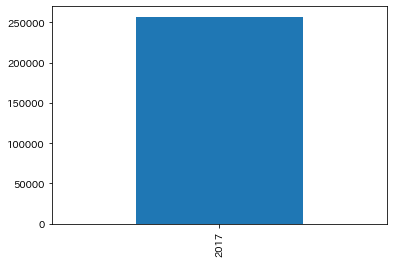

In [54]:
train_pitch["year"].value_counts().plot.bar()

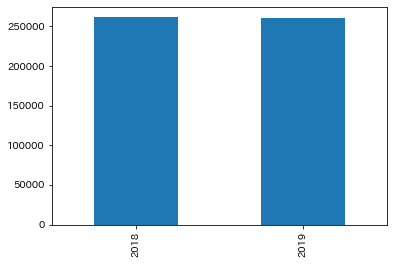

In [55]:
test_pitch["year"].value_counts().plot.bar()

## game_ID

In [56]:
len(train_pitch["game_ID"].unique())

858

In [57]:
len(test_pitch["game_ID"].unique())

1716

1チーム1年143試合*1日セパで6試合 = 858試合/年

## game_index

In [58]:
len(train_pitch["game_index"].unique())

476

In [59]:
len(test_pitch["game_index"].unique())

494

game_IDごとに計算。1事象ごとに加算される値。

## pitchs_in_game

In [61]:
len(train_pitch["pitchs_in_game"].unique())

467

In [62]:
len(test_pitch["pitchs_in_game"].unique())

475

game_IDごとに計算。1投球ごとに加算される値。

## date

In [63]:
len(train_pitch["date"].unique())

169

In [64]:
len(test_pitch["date"].unique())

336

## time

別notebookにて

## home_ID

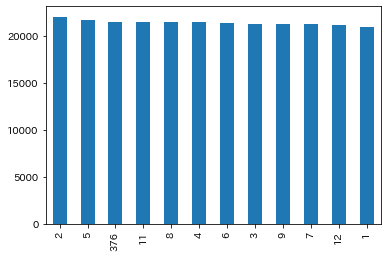

In [65]:
train_pitch["home_ID"].value_counts().plot.bar()

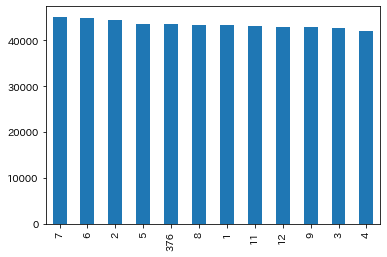

In [66]:
test_pitch["home_ID"].value_counts().plot.bar()

## away_ID

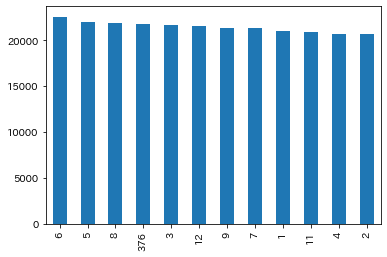

In [67]:
train_pitch["away_ID"].value_counts().plot.bar()

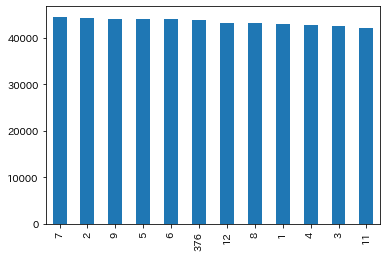

In [68]:
test_pitch["away_ID"].value_counts().plot.bar()

## park_ID, park

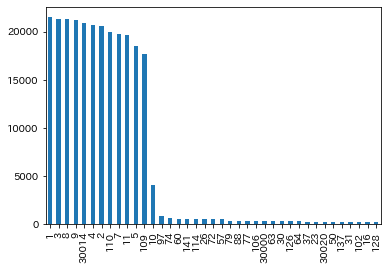

In [69]:
train_pitch["park_ID"].value_counts().plot.bar()

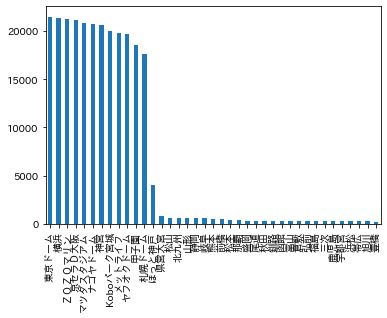

In [71]:
train_pitch["park"].value_counts().plot.bar()

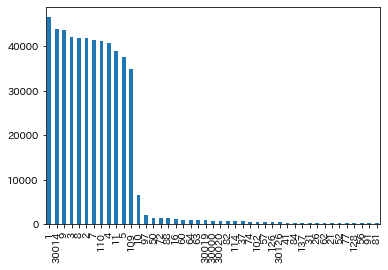

In [70]:
test_pitch["park_ID"].value_counts().plot.bar()

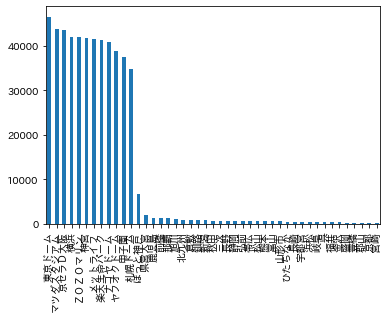

In [72]:
test_pitch["park"].value_counts().plot.bar()

## game_type

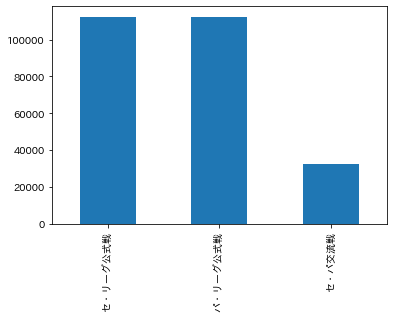

In [73]:
train_pitch["game_type"].value_counts().plot.bar()

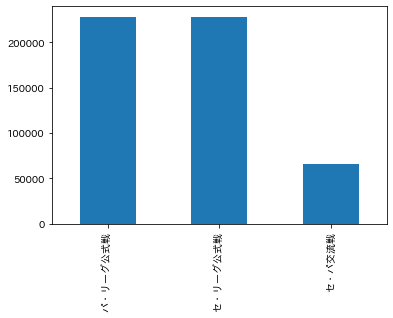

In [74]:
test_pitch["game_type"].value_counts().plot.bar()

## inning

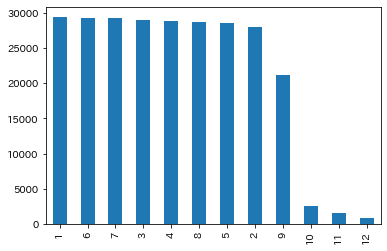

In [75]:
train_pitch["inning"].value_counts().plot.bar()

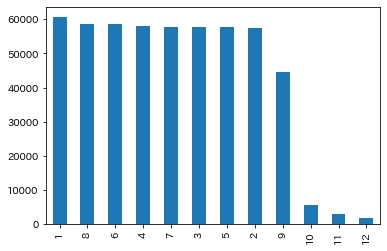

In [76]:
test_pitch["inning"].value_counts().plot.bar()

## top_or_bottom

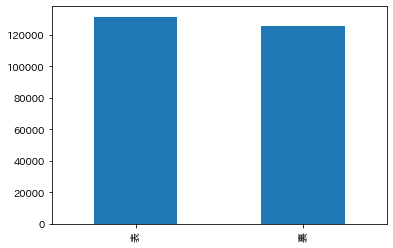

In [77]:
train_pitch["top_or_bottom"].value_counts().plot.bar()

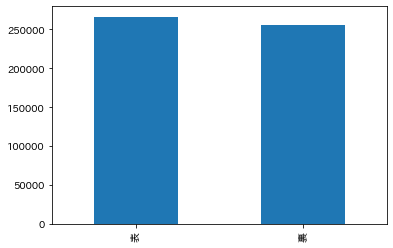

In [78]:
test_pitch["top_or_bottom"].value_counts().plot.bar()

## AB_in_inning

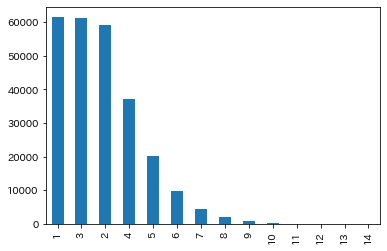

In [79]:
train_pitch["AB_in_inning"].value_counts().plot.bar()

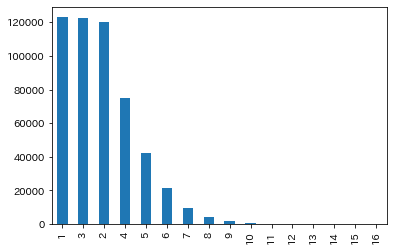

In [80]:
test_pitch["AB_in_inning"].value_counts().plot.bar()

## pitchs_in_PA

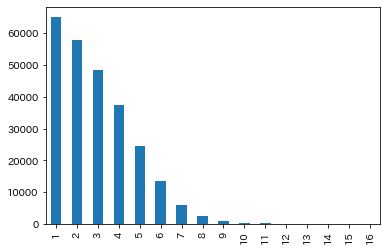

In [81]:
train_pitch["pitchs_in_PA"].value_counts().plot.bar()

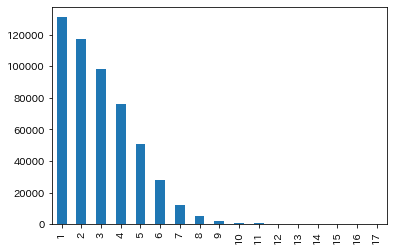

In [82]:
test_pitch["pitchs_in_PA"].value_counts().plot.bar()

## pitcher_ID

In [85]:
len(train_pitch["pitcher_ID"].unique())

326

In [86]:
len(test_pitch["pitcher_ID"].unique())

425